### Assignment 1

A person’s creditworthiness is often associated (conversely) with the likelihood they may default on loans. Here, we ask you to look at data on loan applicants, extract useful insights and guide a business towards decisions. We’re giving you anonymized data on about 1000 loan applications, along with a certain set of attributes about the applicant itself, and whether they were considered high risk. We’d like you to work your magic✨ on this. Do note that it is worse to state an applicant as a low credit risk when they are actually a high risk (cost=4 below), than it is to state an applicant to be a high credit risk when they aren’t (cost=1 below).

![Untitled](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/92a97ec3-3dd9-4ebe-8249-e7007515909b/Untitled.png)

This table contains a possible cost matrix where rows represent the actual classification and the columns the predicted classification with classes: 0 = Low credit risk, 1 = High credit risk


###Objective: 
The objective is to find the parameters to decide the creditworthiness of a customer and derive any other insights from the data

#Solution

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns

In [118]:
app = pd.read_csv('/content/drive/MyDrive/load_defaulter/data/applicant.csv')
loan = pd.read_csv('/content/drive/MyDrive/load_defaulter/data/loan.csv')

In [119]:
app.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [120]:
loan.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


##Merge two dataframes with the primary key

In [121]:
loan = pd.merge(app,loan, on = 'applicant_id')

In [122]:
loan.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,...,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,...,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,...,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [123]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [124]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
applicant_id,1000.0,1514763.121,2.286764e+05,1105364.0,1321398.0,1529114.5,1707751.75,1903505.0
Primary_applicant_age_in_years,1000.0,35.546,1.137547e+01,19.0,27.0,33.0,42.00,75.0
Number_of_dependents,1000.0,1.155,3.620858e-01,1.0,1.0,1.0,1.00,2.0
Years_at_current_residence,1000.0,2.845,1.103718e+00,1.0,2.0,3.0,4.00,4.0
Foreign_worker,1000.0,0.963,1.888562e-01,0.0,1.0,1.0,1.00,1.0
Months_loan_taken_for,1000.0,20.903,1.205881e+01,4.0,12.0,18.0,24.00,72.0
Principal_loan_amount,1000.0,3271258.000,2.822737e+06,250000.0,1365500.0,2319500.0,3972250.00,18424000.0
EMI_rate_in_percentage_of_disposable_income,1000.0,2.973,1.118715e+00,1.0,2.0,3.0,4.00,4.0
Has_coapplicant,1000.0,0.041,1.983894e-01,0.0,0.0,0.0,0.00,1.0
Has_guarantor,1000.0,0.052,2.221381e-01,0.0,0.0,0.0,0.00,1.0


##Data cleaning 
###handling missing values

In [125]:
# null count
loan.isna().sum()

applicant_id                                                  0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Telephone                                                   596
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
loan_application_id                     

In [126]:
#percentage of missing value in column
null_count=round(100*(loan.isnull().sum()/len(loan.index)),2)
null_count

applicant_id                                                 0.0
Primary_applicant_age_in_years                               0.0
Gender                                                       0.0
Marital_status                                               0.0
Number_of_dependents                                         0.0
Housing                                                      0.0
Years_at_current_residence                                   0.0
Employment_status                                            0.0
Has_been_employed_for_at_least                               6.2
Has_been_employed_for_at_most                               25.3
Telephone                                                   59.6
Foreign_worker                                               0.0
Savings_account_balance                                     18.3
Balance_in_existing_bank_account_(lower_limit_of_bucket)    66.8
Balance_in_existing_bank_account_(upper_limit_of_bucket)    45.7
loan_application_id      

In [127]:
null_count=null_count[null_count>=50]
null_count

Telephone                                                   59.6
Balance_in_existing_bank_account_(lower_limit_of_bucket)    66.8
Other_EMI_plans                                             81.4
dtype: float64

In [128]:
cols_dropped=([null_count[null_count >=50.00].index])
loan.drop(labels=cols_dropped[0],axis=1,inplace=True)

In [129]:
#Has_been_employed_for_at_least and Has_been_employed_for_at_most has 6.2 and 25% missing values
#let us first convert this object into int values
loan.Has_been_employed_for_at_least.unique()[0]
# loan.Has_been_employed_for_at_most.unique()



'7 years'

In [130]:
type(loan.Has_been_employed_for_at_least.unique()[0])

str

In [131]:
for c,l in enumerate(loan.Has_been_employed_for_at_least):
  if type(l) != float:
    loan.Has_been_employed_for_at_least[c] = float(l[0])
loan.Has_been_employed_for_at_least



0      7.0
1      1.0
2      4.0
3      4.0
4      1.0
      ... 
995    4.0
996    1.0
997    7.0
998    1.0
999    NaN
Name: Has_been_employed_for_at_least, Length: 1000, dtype: object

In [132]:
for c,l in enumerate(loan.Has_been_employed_for_at_most):
  if type(l) != float:
    loan.Has_been_employed_for_at_most[c] = float(l[0])
loan.Has_been_employed_for_at_most

0      NaN
1      4.0
2      7.0
3      7.0
4      4.0
      ... 
995    7.0
996    4.0
997    NaN
998    4.0
999    0.0
Name: Has_been_employed_for_at_most, Length: 1000, dtype: object

<Axes: xlabel='Has_been_employed_for_at_least', ylabel='Count'>

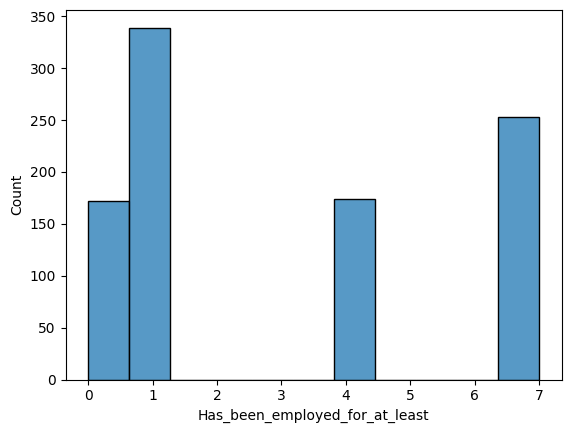

In [133]:
sns.histplot(loan.Has_been_employed_for_at_least)

In [134]:
loan.Has_been_employed_for_at_least.median()

#now we can take median years to fill the missing values
loan['Has_been_employed_for_at_least'] = loan['Has_been_employed_for_at_least'].fillna(loan['Has_been_employed_for_at_least'].median())


In [135]:
loan['Has_been_employed_for_at_most'] = loan['Has_been_employed_for_at_most'].fillna(loan['Has_been_employed_for_at_most'].median())

<Axes: xlabel='Has_coapplicant', ylabel='Count'>

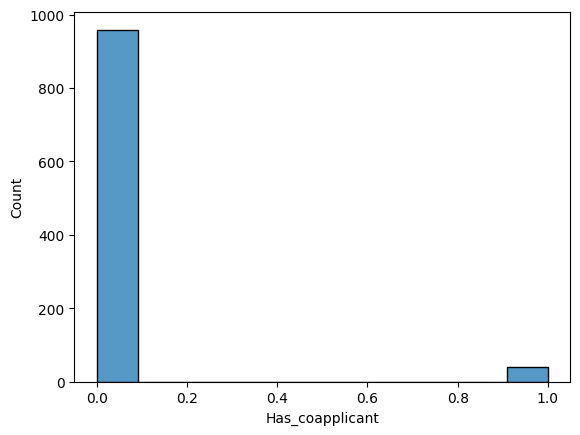

In [136]:
#coapplicant
sns.histplot(loan.Has_coapplicant)
#here we can fill the null values with the mode of the distribution that is one

In [137]:
loan.Has_coapplicant = loan.Has_coapplicant.fillna(loan.Has_coapplicant.mode())

In [138]:
#purpose

'''here we can take loan_amount into consideration as one can simply assume that the purpose of taking loan
and the amount taken can be correlated with each other'''

loan.Purpose.unique()


array(['electronic equipment', 'education', 'FF&E', 'new vehicle',
       'used vehicle', 'business', 'domestic appliances', 'repair costs',
       nan, 'career development'], dtype=object)

In [139]:
'''
here we are using the logic used in k-means algorith
we are first finding the centroid(mean) of each purposes. Then we will take the loan amount of null values(purpose) and 
find from which cluster it has the minimum distance and then we will assign that purpose.
'''
temp = loan.groupby('Purpose').mean().Principal_loan_amount

In [140]:
hashmap = {}

purpose = [x for x in loan.Purpose.unique() if x!= '']
purpose.pop(8)
for i in purpose:
  if i not in hashmap:
    hashmap[i] = temp[i]
print(hashmap)



def findpurpose(amt, hashmap):
  mn = float('inf')
  purpose = []
  for i in list(hashmap.values()):
    if abs(amt - i) < mn:
      mn = abs(amt-i)
      purpose = [x for x in hashmap if hashmap[x] == i]
  return purpose[0]

indexes= []

for l in loan[loan.Purpose.isna()].Principal_loan_amount:
  indexes.append(loan[loan.Principal_loan_amount == l].Purpose.index[0])

for idx in indexes:
  loan.at[idx,'Purpose']= findpurpose(loan.iloc[idx].Principal_loan_amount, hashmap)

{'electronic equipment': 2487653.5714285714, 'education': 3180400.0, 'FF&E': 3066988.950276243, 'new vehicle': 3063025.641025641, 'used vehicle': 5370223.300970874, 'business': 4158041.237113402, 'domestic appliances': 1498000.0, 'repair costs': 2728090.909090909, 'career development': 1205888.888888889}


In [141]:
# [x for x in loan['Balance_in_existing_bank_account_(upper_limit_of_bucket)']]
loan['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].unique()

array(['0', '2 lac', nan], dtype=object)

<Axes: xlabel='Balance_in_existing_bank_account_(upper_limit_of_bucket)', ylabel='Count'>

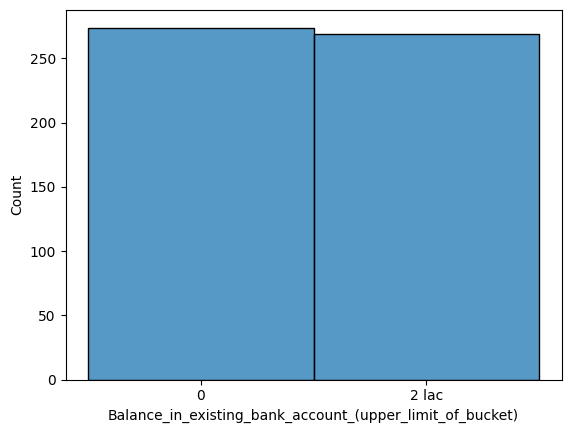

In [142]:
sns.histplot(loan['Balance_in_existing_bank_account_(upper_limit_of_bucket)'])
#I'm currently unable to understand the meaning of this feature and as it has 45% missing values, I'm ignoring this column


In [143]:
loan.drop(columns = 'Balance_in_existing_bank_account_(upper_limit_of_bucket)',inplace = True)

In [144]:
loan.Property.unique()

array(['real estate', 'building society savings agreement/life insurance',
       nan, 'car or other'], dtype=object)

In [145]:
loan.Purpose.unique()

array(['electronic equipment', 'education', 'FF&E', 'new vehicle',
       'used vehicle', 'business', 'domestic appliances', 'repair costs',
       'career development'], dtype=object)

In [146]:
loan[['Property','Purpose']]

,Property,Purpose
0,real estate,electronic equipment
1,real estate,electronic equipment
2,real estate,education
3,building society savings agreement/life insurance,FF&E
4,NaN,new vehicle
...,...,...
995,real estate,FF&E
996,building society savings agreement/life insurance,used vehicle
997,car or other,electronic equipment
998,NaN,electronic equipment


In [147]:
loan.Savings_account_balance.unique()

array([nan, 'Low', 'High', 'Very high', 'Medium'], dtype=object)

<Axes: xlabel='Savings_account_balance', ylabel='Count'>

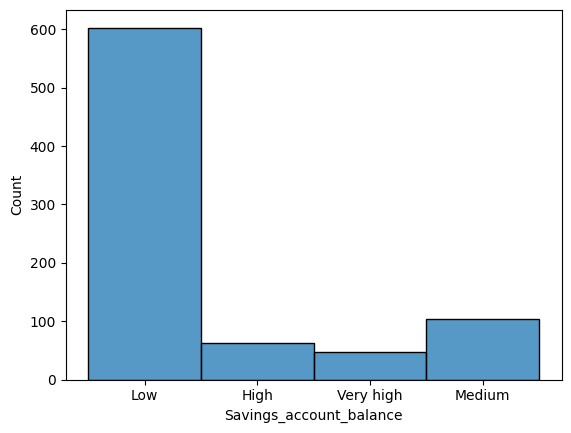

In [148]:
sns.histplot(loan.Savings_account_balance)

here the maximum number of saving_account_balance has low balance so we will use this to fill the missing values

In [149]:
loan.Savings_account_balance = loan.Savings_account_balance.fillna(loan.Savings_account_balance.mode()[0])

In [150]:
loan.Property = loan.Property.fillna(loan.Property.mode()[0])

In [151]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

applicant_id                                   0.0
Primary_applicant_age_in_years                 0.0
Gender                                         0.0
Marital_status                                 0.0
Number_of_dependents                           0.0
Housing                                        0.0
Years_at_current_residence                     0.0
Employment_status                              0.0
Has_been_employed_for_at_least                 0.0
Has_been_employed_for_at_most                  0.0
Foreign_worker                                 0.0
Savings_account_balance                        0.0
loan_application_id                            0.0
Months_loan_taken_for                          0.0
Purpose                                        0.0
Principal_loan_amount                          0.0
EMI_rate_in_percentage_of_disposable_income    0.0
Property                                       0.0
Has_coapplicant                                0.0
Has_guarantor                  

Here we have handled all the missing data from our dataset

##Divide the dataset into numeric and categorical subparts

In [152]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   applicant_id                                 1000 non-null   int64  
 1   Primary_applicant_age_in_years               1000 non-null   int64  
 2   Gender                                       1000 non-null   object 
 3   Marital_status                               1000 non-null   object 
 4   Number_of_dependents                         1000 non-null   int64  
 5   Housing                                      1000 non-null   object 
 6   Years_at_current_residence                   1000 non-null   int64  
 7   Employment_status                            1000 non-null   object 
 8   Has_been_employed_for_at_least               1000 non-null   float64
 9   Has_been_employed_for_at_most                1000 non-null   float64
 10  F

In [153]:
category_loan_ls = list(loan.select_dtypes(include='object').columns)
numeric_loan = loan.drop(columns = category_loan_ls)
category_loan_ls.extend(['high_risk_applicant','applicant_id'])
category_loan = loan[category_loan_ls]
# category_loan.drop(columns = 'loan_application_id',inplace = True)

In [154]:
numeric_loan.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   applicant_id                                 1000 non-null   int64  
 1   Primary_applicant_age_in_years               1000 non-null   int64  
 2   Number_of_dependents                         1000 non-null   int64  
 3   Years_at_current_residence                   1000 non-null   int64  
 4   Has_been_employed_for_at_least               1000 non-null   float64
 5   Has_been_employed_for_at_most                1000 non-null   float64
 6   Foreign_worker                               1000 non-null   int64  
 7   Months_loan_taken_for                        1000 non-null   int64  
 8   Principal_loan_amount                        1000 non-null   int64  
 9   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64  
 10  H

##Categorical Analysis

In [155]:
category_loan.head()
category_loan.drop(columns = 'loan_application_id',inplace = True) #it is unnecessary

In [156]:
list(category_loan.columns)

['Gender',
 'Marital_status',
 'Housing',
 'Employment_status',
 'Savings_account_balance',
 'Purpose',
 'Property',
 'Loan_history',
 'high_risk_applicant',
 'applicant_id']

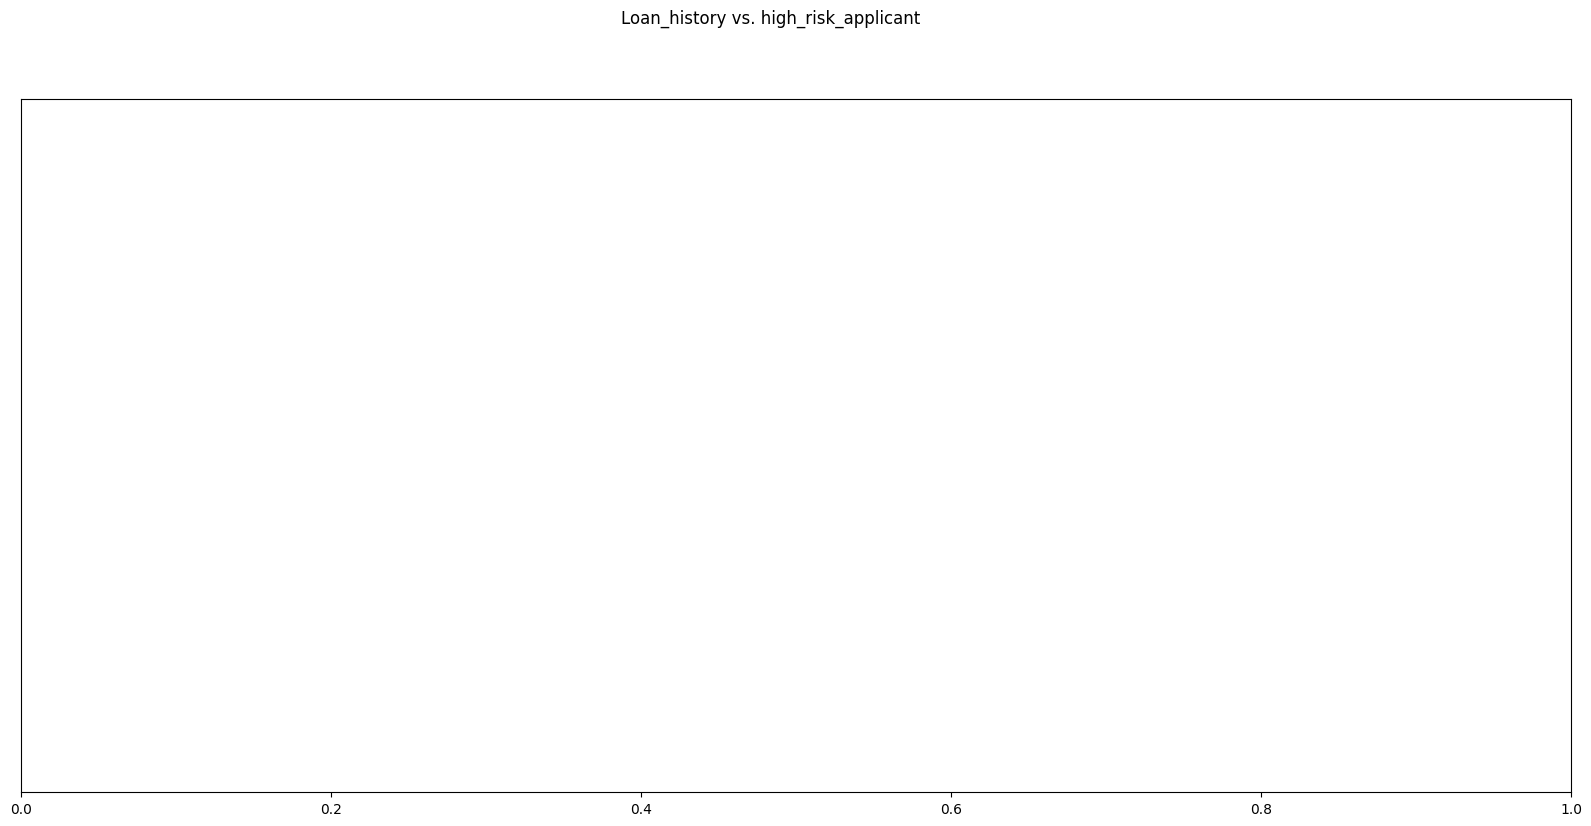

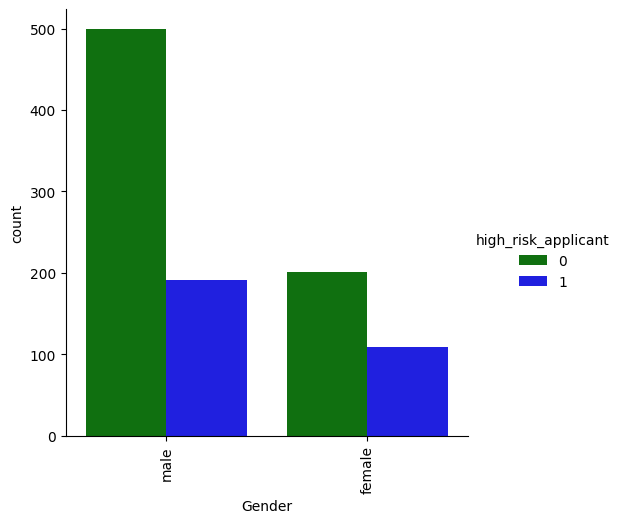

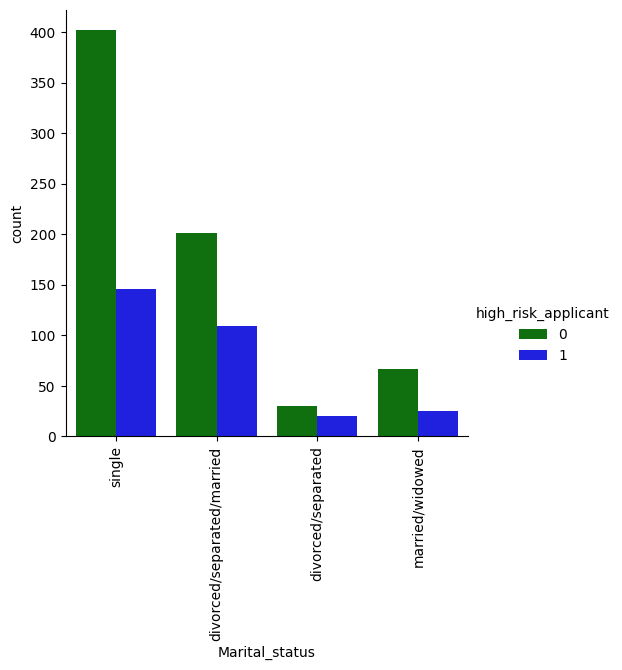

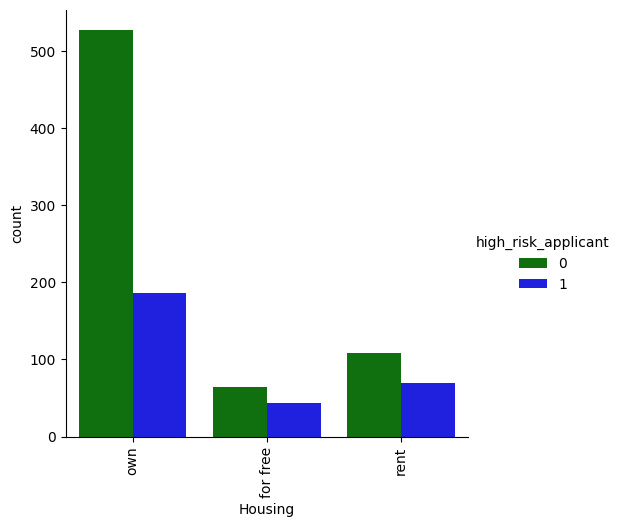

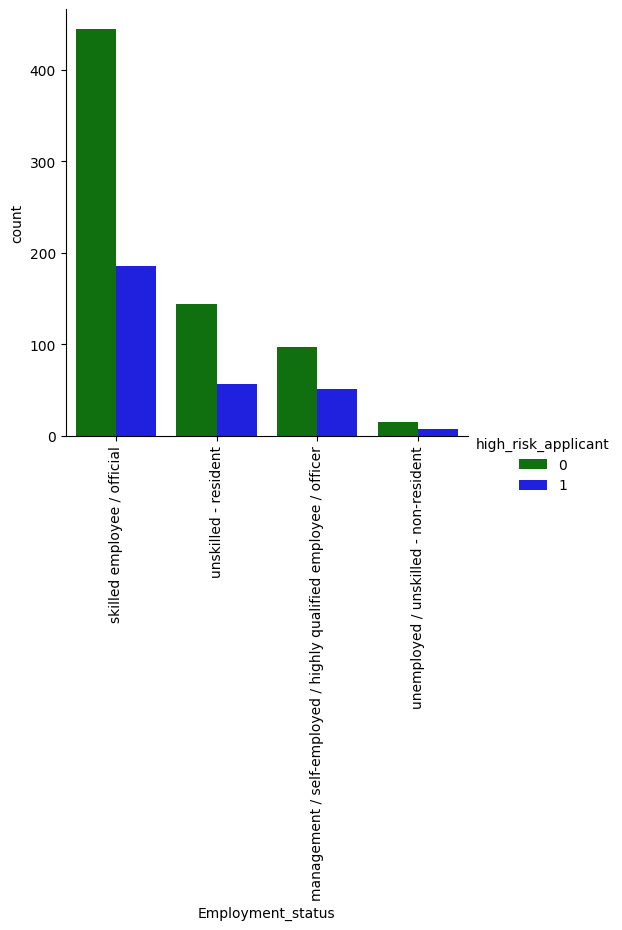

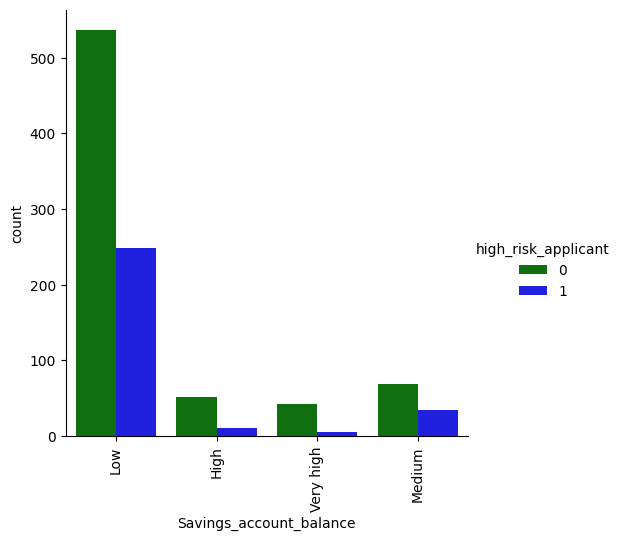

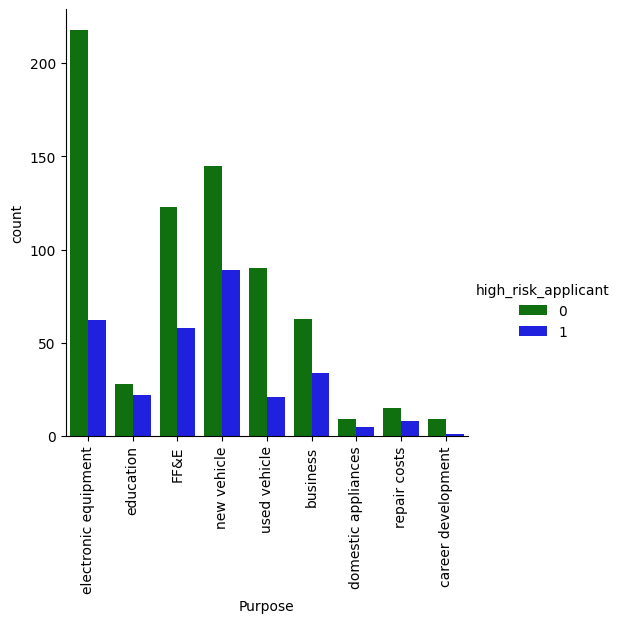

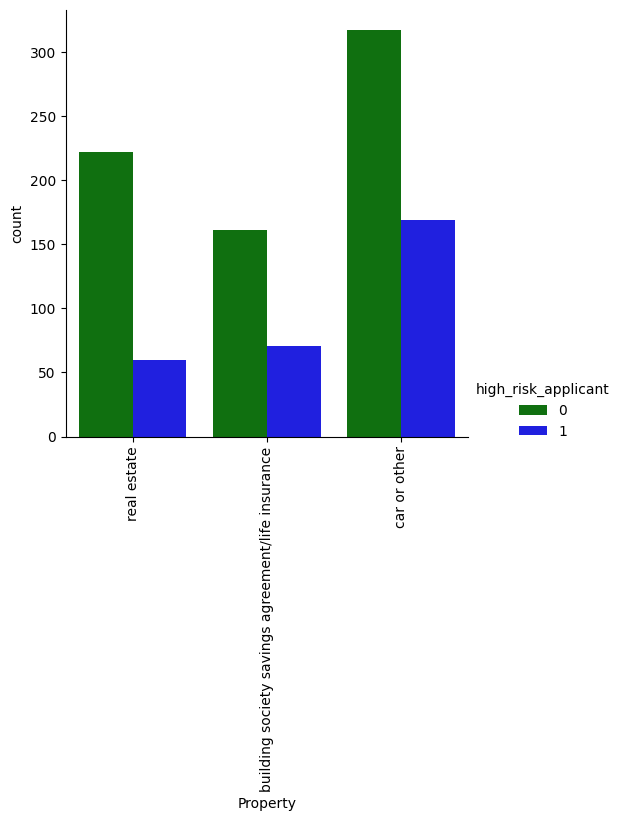

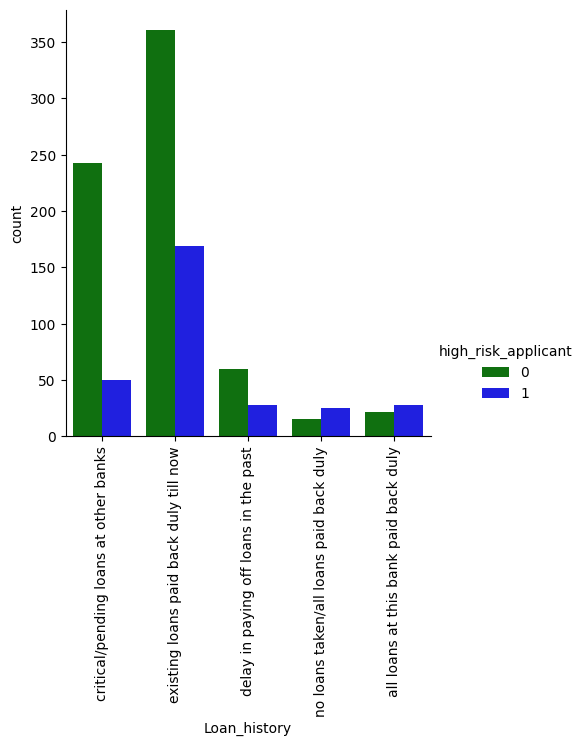

In [157]:
fig, ax = plt.subplots(figsize=(20,9))


for x in list(category_loan.columns):
  
  if x != 'high_risk_applicant' and x!='applicant_id':

    s = sns.catplot(data = category_loan,x = f"{x}", hue="high_risk_applicant", kind="count", palette={1:"blue", 0:"green"}, ax=ax)
    s.set_xticklabels(labels = loan[f'{x}'].unique(), rotation = 90)
    ax.get_yaxis().set_visible(False)

    fig.suptitle(f"{x} vs. high_risk_applicant")
 

In [158]:
#here we are splitting high risk applicants with low risk applicants for further analysis
category_high = category_loan[category_loan.high_risk_applicant == 1]
category_low = category_loan[category_loan.high_risk_applicant == 0]

In [159]:
for cat in list(category_loan.columns):
  if cat != 'high_risk_applicant' and cat!='applicant_id':
    for scat in list(category_loan[f'{cat}'].unique()):
      total = len(category_loan[category_loan[f'{cat}'] == f'{scat}'])
      high_per = round(len(category_high[category_loan[f'{cat}'] == f'{scat}'])/total*100,2)
      low_per = round(100 - high_per,2)
      print(f'(Percentage, number) of {scat} with high risk:', (high_per,len(category_high[category_loan[f'{cat}'] == f'{scat}'])))
      # print(f'Number of {scat} with high risk: ',len(category_high[category_loan[f'{cat}'] == f'{scat}']))
      # print(f'Percentage of {scat} with low risk:', low_per)
    print('--------------------------------------------------------------')

(Percentage, number) of male with high risk: (27.68, 191)
(Percentage, number) of female with high risk: (35.16, 109)
--------------------------------------------------------------
(Percentage, number) of single with high risk: (26.64, 146)
(Percentage, number) of divorced/separated/married with high risk: (35.16, 109)
(Percentage, number) of divorced/separated with high risk: (40.0, 20)
(Percentage, number) of married/widowed with high risk: (27.17, 25)
--------------------------------------------------------------
(Percentage, number) of own with high risk: (26.09, 186)
(Percentage, number) of for free with high risk: (40.74, 44)
(Percentage, number) of rent with high risk: (39.11, 70)
--------------------------------------------------------------
(Percentage, number) of skilled employee / official with high risk: (29.52, 186)
(Percentage, number) of unskilled - resident with high risk: (28.0, 56)
(Percentage, number) of management / self-employed / highly qualified employee / office

Observations:

1. Comparte to man, woman has greater chances of defualting a loan.

2. Loans taken for the purpose of education and new_vehicles are the loans which defualts the most.

3. Apparantly the person who didnt't take any loans previously and has a good track record of loan payments has the greater percentage of defaulting a loan. This is with the contradiction of logical thinking.

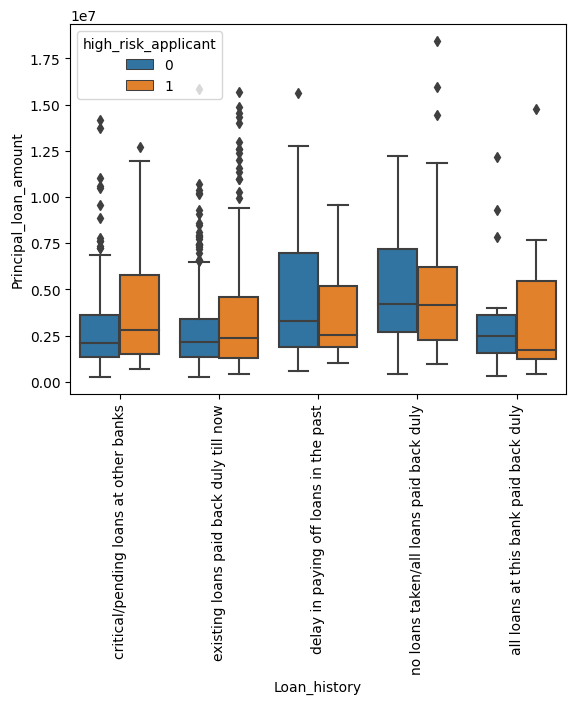

In [160]:
s = sns.boxplot(data  = loan, x = 'Loan_history', y = 'Principal_loan_amount', hue = 'high_risk_applicant')
s.set_xticklabels(labels = list(loan.Loan_history.unique()), rotation = 90)
plt.show()

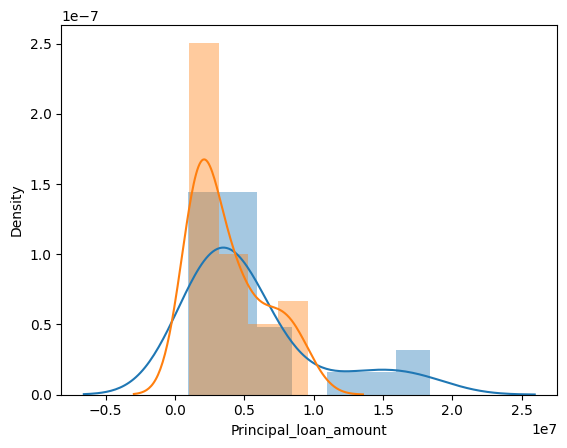

In [161]:
fltr  =(loan['Loan_history'] == 'no loans taken/all loans paid back duly') & (loan.high_risk_applicant == 1)
fltr2  =(loan['Loan_history'] == 'delay in paying off loans in the past') & (loan.high_risk_applicant == 1)
sns.distplot(loan[fltr].Principal_loan_amount)
sns.distplot(loan[fltr2].Principal_loan_amount)
plt.show()

Observation:
1. Blue indicated the customers with risk = 1 and orange indicated the customers with risk = 0. One possible explaination why the customer having bad track has higher creditworthiness is that 
some customers with good track record also took larger amount of loans whereas the customer with relatively bad track record took smaller amount of loans. 
But still to provide statistical logic we must understand other features as well. 

#Statistical Testing
##1. chi-square testing 

In [162]:
#for each categorical feature we will find the contigency table

housing_risk_ct = pd.crosstab(index = category_loan.Housing, columns = category_loan.high_risk_applicant)
housing_risk_ct

high_risk_applicant,0,1
Housing,,
for free,64,44
own,527,186
rent,109,70


In [163]:
from scipy import stats
chi_map = {}
chi_comp = ()
for ft in list(category_loan.columns)[:-2]:
  ct = pd.crosstab(index = category_loan[f'{ft}'], columns = category_loan.high_risk_applicant)
  ls = []
  for i in range(len(ct)):
    ls.append(ct.iloc[i].values)
  (chi,p,df,_) = stats.chi2_contingency(ls)
  chi_map[f'{ft}'] = chi
  print(f'chi2 for {ft}: ',chi)
  print(f'p for {ft}:', p)
  print('degree of freedom: ',df)
  print('-------------------------------------------------------------------')



chi2 for Gender:  5.348516218081436
p for Gender: 0.020739913068713305
degree of freedom:  1
-------------------------------------------------------------------
chi2 for Marital_status:  9.60521395933605
p for Marital_status: 0.02223800546926877
degree of freedom:  3
-------------------------------------------------------------------
chi2 for Housing:  18.199841582563625
p for Housing: 0.00011167465374597664
degree of freedom:  2
-------------------------------------------------------------------
chi2 for Employment_status:  1.8851560280131707
p for Employment_status: 0.5965815918843431
degree of freedom:  3
-------------------------------------------------------------------
chi2 for Savings_account_balance:  13.2172156229604
p for Savings_account_balance: 0.004189653304672615
degree of freedom:  3
-------------------------------------------------------------------
chi2 for Purpose:  30.49264697928624
p for Purpose: 0.00017291334058158015
degree of freedom:  8
-------------------------

In [165]:
def chi_feature_selection(category_loan):
  sel_ft = []
  rej_ft = []
  from scipy import stats
  chi_map = {}
  chi_comp = ()
  for ft in list(category_loan.columns)[:-2]:
    ct = pd.crosstab(index = category_loan[f'{ft}'], columns = category_loan.high_risk_applicant)
    ls = []
    for i in range(len(ct)):
      ls.append(ct.iloc[i].values)
    (chi,p,df,_) = stats.chi2_contingency(ls)
    expected_chi = stats.chi2.ppf(1-.05, df=df)
    if chi > expected_chi:
      sel_ft.append(ft)
    else:
      rej_ft.append(ft)
  return sel_ft, rej_ft

    



In [166]:
selected_features, rejected_features = chi_feature_selection(category_loan)

In [167]:
rejected_features

['Employment_status']

In [168]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 55.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.2 which is incompatible.


In [170]:
from dython.nominal import associations

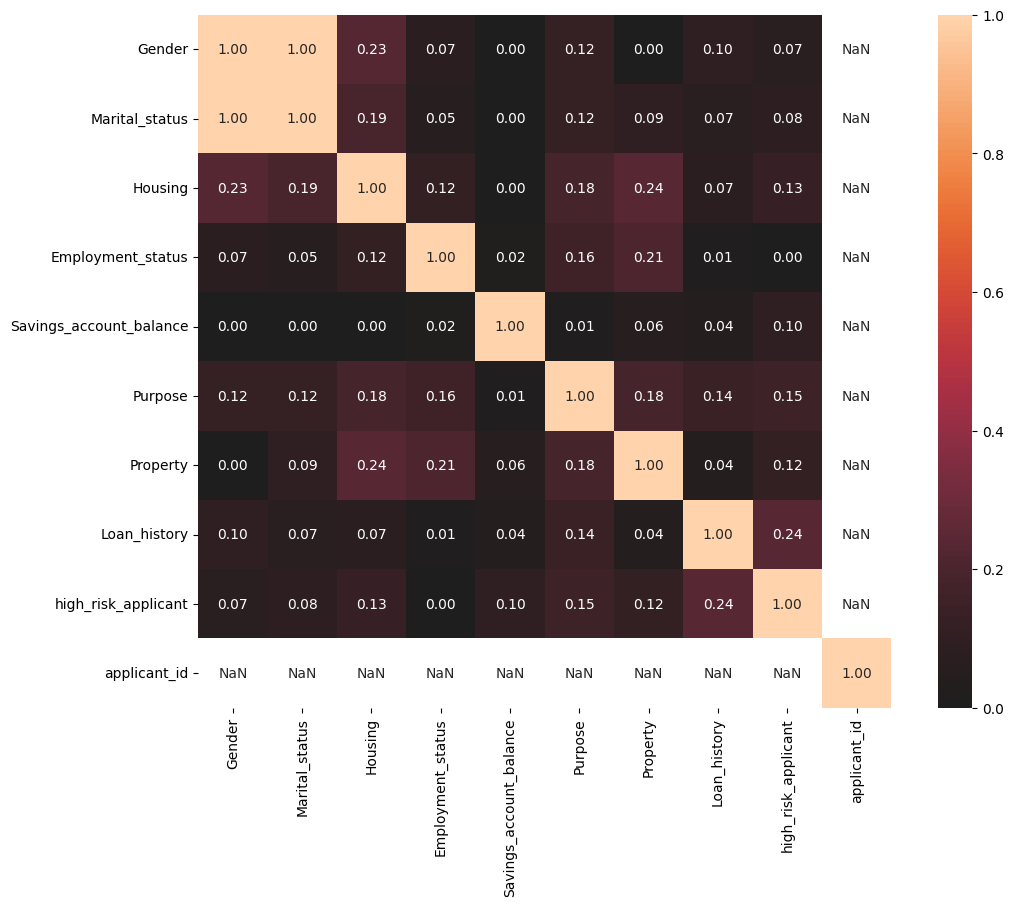

{'corr':                            Gender  Marital_status   Housing  \
 Gender                   1.000000        0.998997  0.228046   
 Marital_status           0.998997        1.000000  0.194792   
 Housing                  0.228046        0.194792  1.000000   
 Employment_status        0.072871        0.054370  0.115021   
 Savings_account_balance  0.000000        0.000000  0.000000   
 Purpose                  0.124340        0.117723  0.183974   
 Property                 0.000000        0.094379  0.235500   
 Loan_history             0.097381        0.067460  0.073947   
 high_risk_applicant      0.065969        0.081295  0.127334   
 applicant_id             0.000000        0.000000  0.000000   
 
                          Employment_status  Savings_account_balance   Purpose  \
 Gender                            0.072871                 0.000000  0.124340   
 Marital_status                    0.054370                 0.000000  0.117723   
 Housing                           0.115

In [171]:
associations(category_loan, nominal_columns = 'all', figsize = (12,9), nom_nom_assoc='cramer')

#Observation from the cramers'V test and chi-square test:
1. Logically, loan history and purpose of taking loan should impact the creditworthiness of a person. Here from the Cramers'V test we can strengthen this logic statistically.

2. Logically person's employment status can also affect his/her creditworthiness. But here by results of running both chi-square and cramers'V test on the given dataset suggest the contradiction with our logic. 

3. Housing has a good amount of correlation with the Gender, to further analyze the realtion between this two let's visualize both of these features together.

In [172]:
category_loan["gen_house"] = category_loan[["Gender", "Housing"]].apply(" & ".join, axis=1)

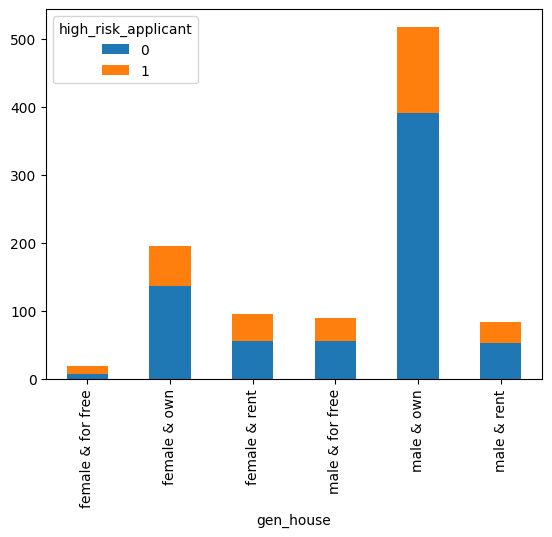

In [173]:
ln_plot = category_loan.groupby(['high_risk_applicant', 'gen_house']).size().reset_index().pivot(columns='high_risk_applicant', index='gen_house', values=0)
l1 = ln_plot.plot(kind='bar', stacked=True)



In [174]:
for scat in list(category_loan.gen_house.unique()):
  total = len(category_loan[category_loan['gen_house'] == f'{scat}'])
  high_per = round(len(category_high[category_loan['gen_house'] == f'{scat}'])/total*100,2)
  low_per = round(100 - high_per,2)
  print(f'(Percentage, number) of {scat} with high risk:', (high_per,len(category_high[category_loan['gen_house'] == f'{scat}'])))

(Percentage, number) of male & own with high risk: (24.56, 127)
(Percentage, number) of female & own with high risk: (30.1, 59)
(Percentage, number) of male & for free with high risk: (37.08, 33)
(Percentage, number) of male & rent with high risk: (36.9, 31)
(Percentage, number) of female & rent with high risk: (41.05, 39)
(Percentage, number) of female & for free with high risk: (57.89, 11)


Observation from combination of Gender and Housing features:

1. We can see that the highest number of loan applicants are those man who owns the house by themselves.

2. Females who lives for free have highest chances of defualt their loans.

3. Males who own the houses have the least chance of loan defualt.

4. There is a good chance that a femate either living for free or paying rent will default a loan.


1. Here we can see that combining housing and gender won't change the correaltion with high-risk-applicant by much amount.

2. There isn't any significant change by combining history and purpose either. So we cannot conclude anything from it.

2. gen_housing is highly correlated with the marital status feature. Let's combine them and see what we can further infer from it.

In [175]:
category_loan.head()

,Gender,Marital_status,Housing,Employment_status,Savings_account_balance,Purpose,Property,Loan_history,high_risk_applicant,applicant_id,gen_house
0,male,single,own,skilled employee / official,Low,electronic equipment,real estate,critical/pending loans at other banks,0,1469590,male & own
1,female,divorced/separated/married,own,skilled employee / official,Low,electronic equipment,real estate,existing loans paid back duly till now,1,1203873,female & own
2,male,single,own,unskilled - resident,Low,education,real estate,critical/pending loans at other banks,0,1432761,male & own
3,male,single,for free,skilled employee / official,Low,FF&E,building society savings agreement/life insurance,existing loans paid back duly till now,0,1207582,male & for free
4,male,single,for free,skilled employee / official,Low,new vehicle,car or other,delay in paying off loans in the past,1,1674436,male & for free


In [176]:
category_loan.head()
category_loan_feature_selection = category_loan.drop(columns = ['Gender','Housing','Employment_status'], axis=0)


In [177]:
category_loan_feature_selection.head()

,Marital_status,Savings_account_balance,Purpose,Property,Loan_history,high_risk_applicant,applicant_id,gen_house
0,single,Low,electronic equipment,real estate,critical/pending loans at other banks,0,1469590,male & own
1,divorced/separated/married,Low,electronic equipment,real estate,existing loans paid back duly till now,1,1203873,female & own
2,single,Low,education,real estate,critical/pending loans at other banks,0,1432761,male & own
3,single,Low,FF&E,building society savings agreement/life insurance,existing loans paid back duly till now,0,1207582,male & for free
4,single,Low,new vehicle,car or other,delay in paying off loans in the past,1,1674436,male & for free


##Now let's analyze all the numerical features



In [ ]:
numeric_loan.columns
numeric_loan.Years_at_current_residence.unique()

array([4, 2, 3, 1])

In [ ]:
#here applicant id has no significance so we can remove it

numeric_loan.drop(columns = 'applicant_id', inplace = True)

##Feature Selection

Here we will use the Boruta algorithm which is a wrapper built around the random forest classification algorithm. It tries to capture all the important, interesting features in a data set with respect to an outcome variable.

Methodology:
Firstly, it adds randomness to the given data set by creating shuffled copies of all features (which are called shadow features).

Then, it trains a random forest classifier on the extended data set and applies a feature importance measure (the default is Mean Decrease Accuracy) to evaluate the importance of each feature where higher means more important.

At every iteration, it checks whether a real feature has a higher importance than the best of its shadow features (i.e. whether the feature has a higher Z-score than the maximum Z-score of its shadow features) and constantly removes features which are deemed highly unimportant.

Finally, the algorithm stops either when all features get confirmed or rejected or it reaches a specified limit of random forest runs.

In [ ]:
!pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 5.0 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
#define the features
X = numeric_loan.iloc[:,:-1].values
y = numeric_loan.iloc[:,-1].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
 
# find all relevant features
feat_selector.fit(X, y)

# show the most important features
most_important = numeric_loan.columns[:-1][feat_selector.support_].tolist()

# select the top 7 features
top_features = numeric_loan.columns[:-1][feat_selector.ranking_ <=6].tolist()
top_features

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	9
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	9
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	9
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	9
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	0
Rejected: 	11


BorutaPy finished running.

Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	0
Rejected: 	11


['Primary_applicant_age_in_years',
 'Years_at_current_residence',
 'Has_been_employed_for_at_least',
 'Months_loan_taken_for',
 'Principal_loan_amount',
 'EMI_rate_in_percentage_of_disposable_income']

We will consider this top 6 features in further analysis.

In [ ]:
numeric_loan2=  numeric_loan[['Primary_applicant_age_in_years',
 'Years_at_current_residence',
 'Has_been_employed_for_at_least',
 'Months_loan_taken_for',
 'Principal_loan_amount',
 'EMI_rate_in_percentage_of_disposable_income','high_risk_applicant']]
numeric_loan2.head()

,Primary_applicant_age_in_years,Years_at_current_residence,Has_been_employed_for_at_least,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,high_risk_applicant
0,67,4,7.0,6,1169000,4,0
1,22,2,1.0,48,5951000,2,1
2,49,3,4.0,12,2096000,2,0
3,45,4,4.0,42,7882000,2,0
4,53,4,1.0,24,4870000,3,1


Let's look at realtion of of all the features w.r.t their creditworthiness.

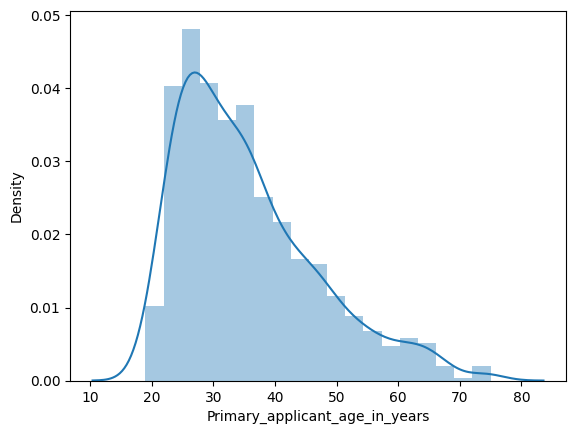

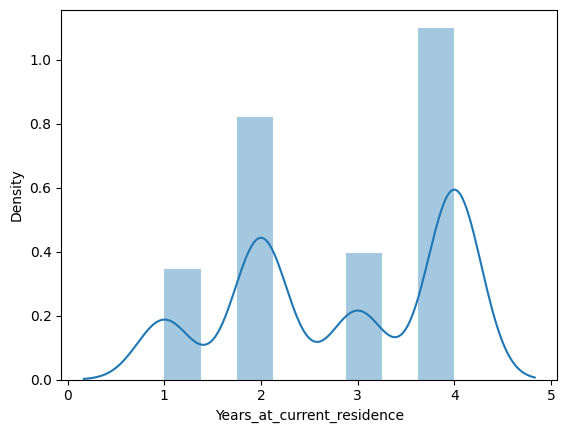

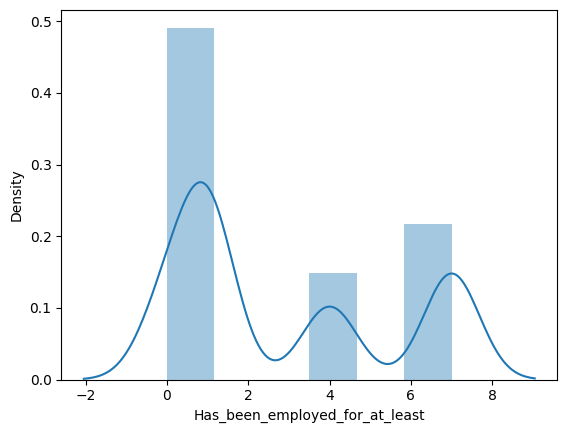

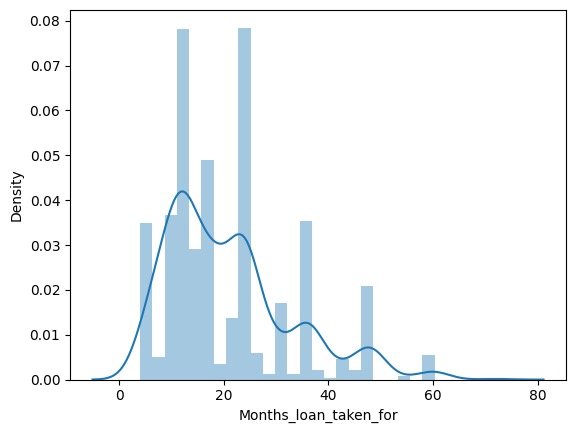

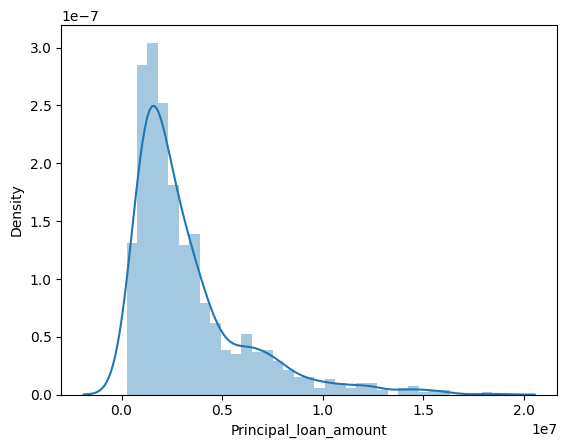

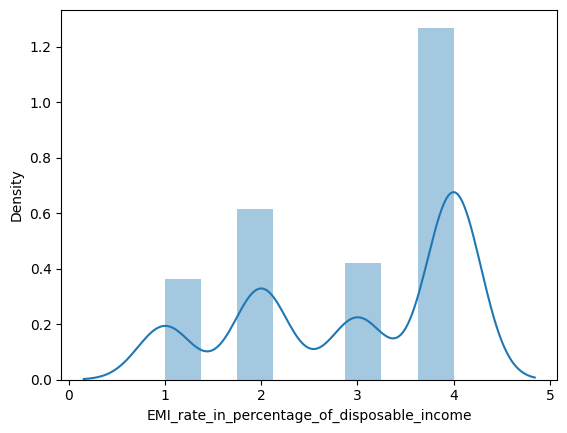

In [ ]:
fig,ax = plt.subplots()

for x in list(numeric_loan2.columns)[:-1]:
  sns.distplot(numeric_loan2[f'{x}'])
  plt.show()
  

Observations:

1. Here we can clearly observe that the age of the applicant and Principal loan amount's data is left skewed. 

2. Maximum number of loan applicants are between age 25-40. We can say that as the age increases people usually avoid taking loans.

3. Maximum number of people took 10-30 Lakhs of loan.

TypeError: ignored

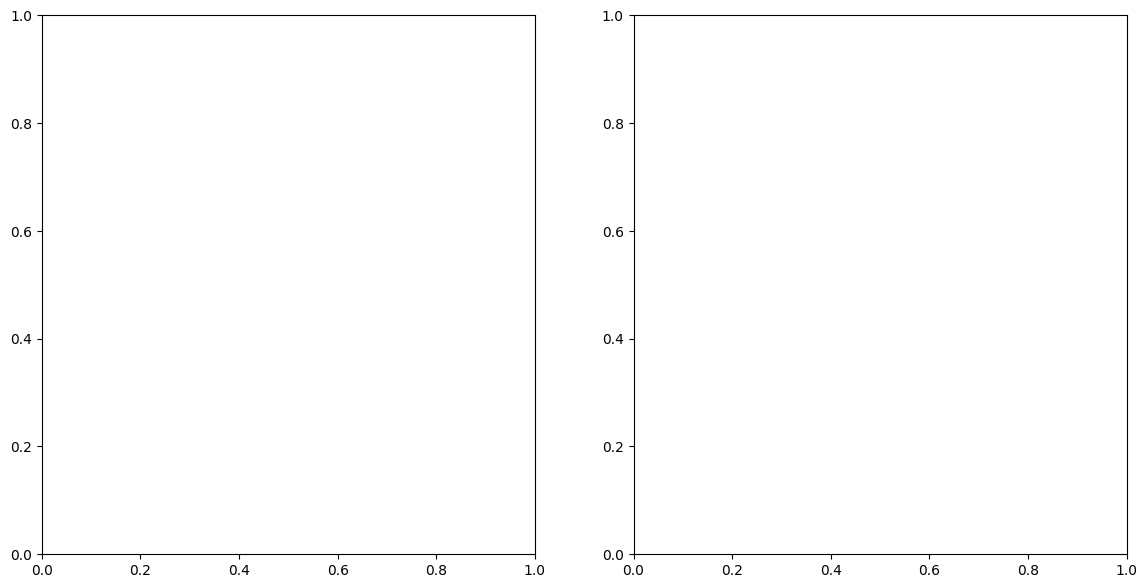

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(14,7))
b1 = sns.boxplot(numeric_loan2.high_risk_applicant, numeric_loan2.Primary_applicant_age_in_years,ax=ax[0])
b3 = sns.boxplot(numeric_loan2.high_risk_applicant, numeric_loan2.Principal_loan_amount, ax= ax[1])
plt.show()

Observation:

1. Here in the case of applicant's age the distribution for both category is almost similar. So we cannot conclude anythin from it. To better understand the role of age we can divide applicants into different age groups.

2. Observing the second box plot we can say that applicant who took loan of more than 30 lakhs has higher chances of defaulting the loan. But below that amount we cannot infer anything about creditworthiness.


[]

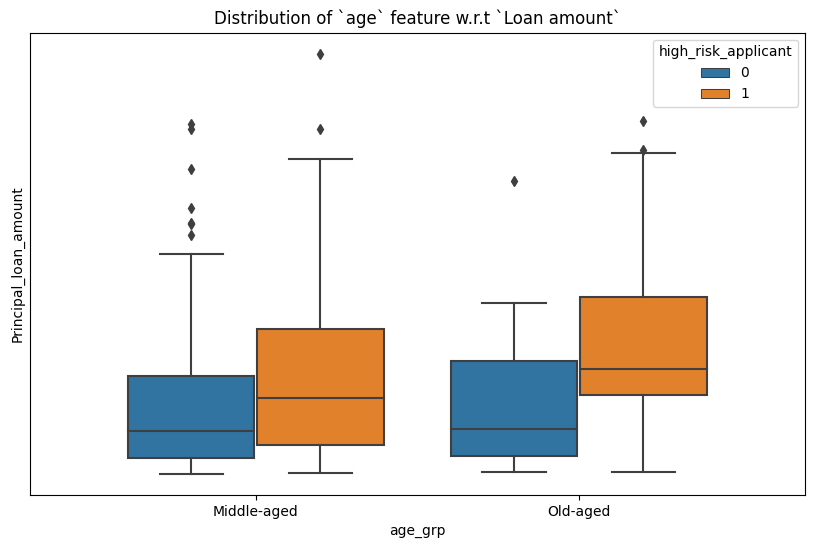

In [ ]:
grp_1 = "Middle-aged"
grp_2 = "Old-aged"
mid_age = 52 #mean of the datapoints
# Add new column to store age group of patients.
numeric_loan2["age_grp"] = numeric_loan2["Primary_applicant_age_in_years"].apply(lambda age: grp_1 if age <= mid_age else grp_2)

# DataFrame filter for patients with affected nodes.
fltr = numeric_loan2["Principal_loan_amount"] > 3000000
nodes_gtz = numeric_loan2[fltr]  # Apply filter

# Plot box-plot
plt.figure(figsize=(10, 6))

sns.boxplot(x="age_grp", y="Principal_loan_amount", hue="high_risk_applicant", data=nodes_gtz, order=[grp_1, grp_2])
plt.title("Distribution of `age` feature w.r.t `Loan amount`")
plt.yticks(ticks=range(0, 55, 5))

plt.savefig("14. Distribution of `age` feature w.r.t `Loan amount`.png")
plt.plot()

Obervations:

1. Old-aged people(age>52) has significant chances of loan defualt if the amount of loan is greater than 30 Lakh.



In [ ]:
grp_1 = "Middle-aged"
grp_2 = "Old-aged"
mid_age = 52 #mean of the datapoints
# Add new column to store age group of patients.
numeric_loan2["age_grp"] = numeric_loan2["Primary_applicant_age_in_years"].apply(lambda age: grp_1 if age <= mid_age else grp_2)

# DataFrame filter for patients with affected nodes.
fltr = (numeric_loan2["Principal_loan_amount"] > 3000000) & (loan.Has_coapplicant == 1)
nodes_gtz = numeric_loan2[fltr]  # Apply filter

# Plot box-plot
plt.figure(figsize=(10, 6))

sns.boxplot(x="age_grp", y="Principal_loan_amount", hue="high_risk_applicant", data=nodes_gtz, order=[grp_1, grp_2])
plt.title("Distribution of `age` feature w.r.t `Loan amount`")
plt.yticks(ticks=range(0, 55, 5))

plt.savefig("14. Distribution of `age` feature w.r.t `Loan amount`.png")
plt.plot()

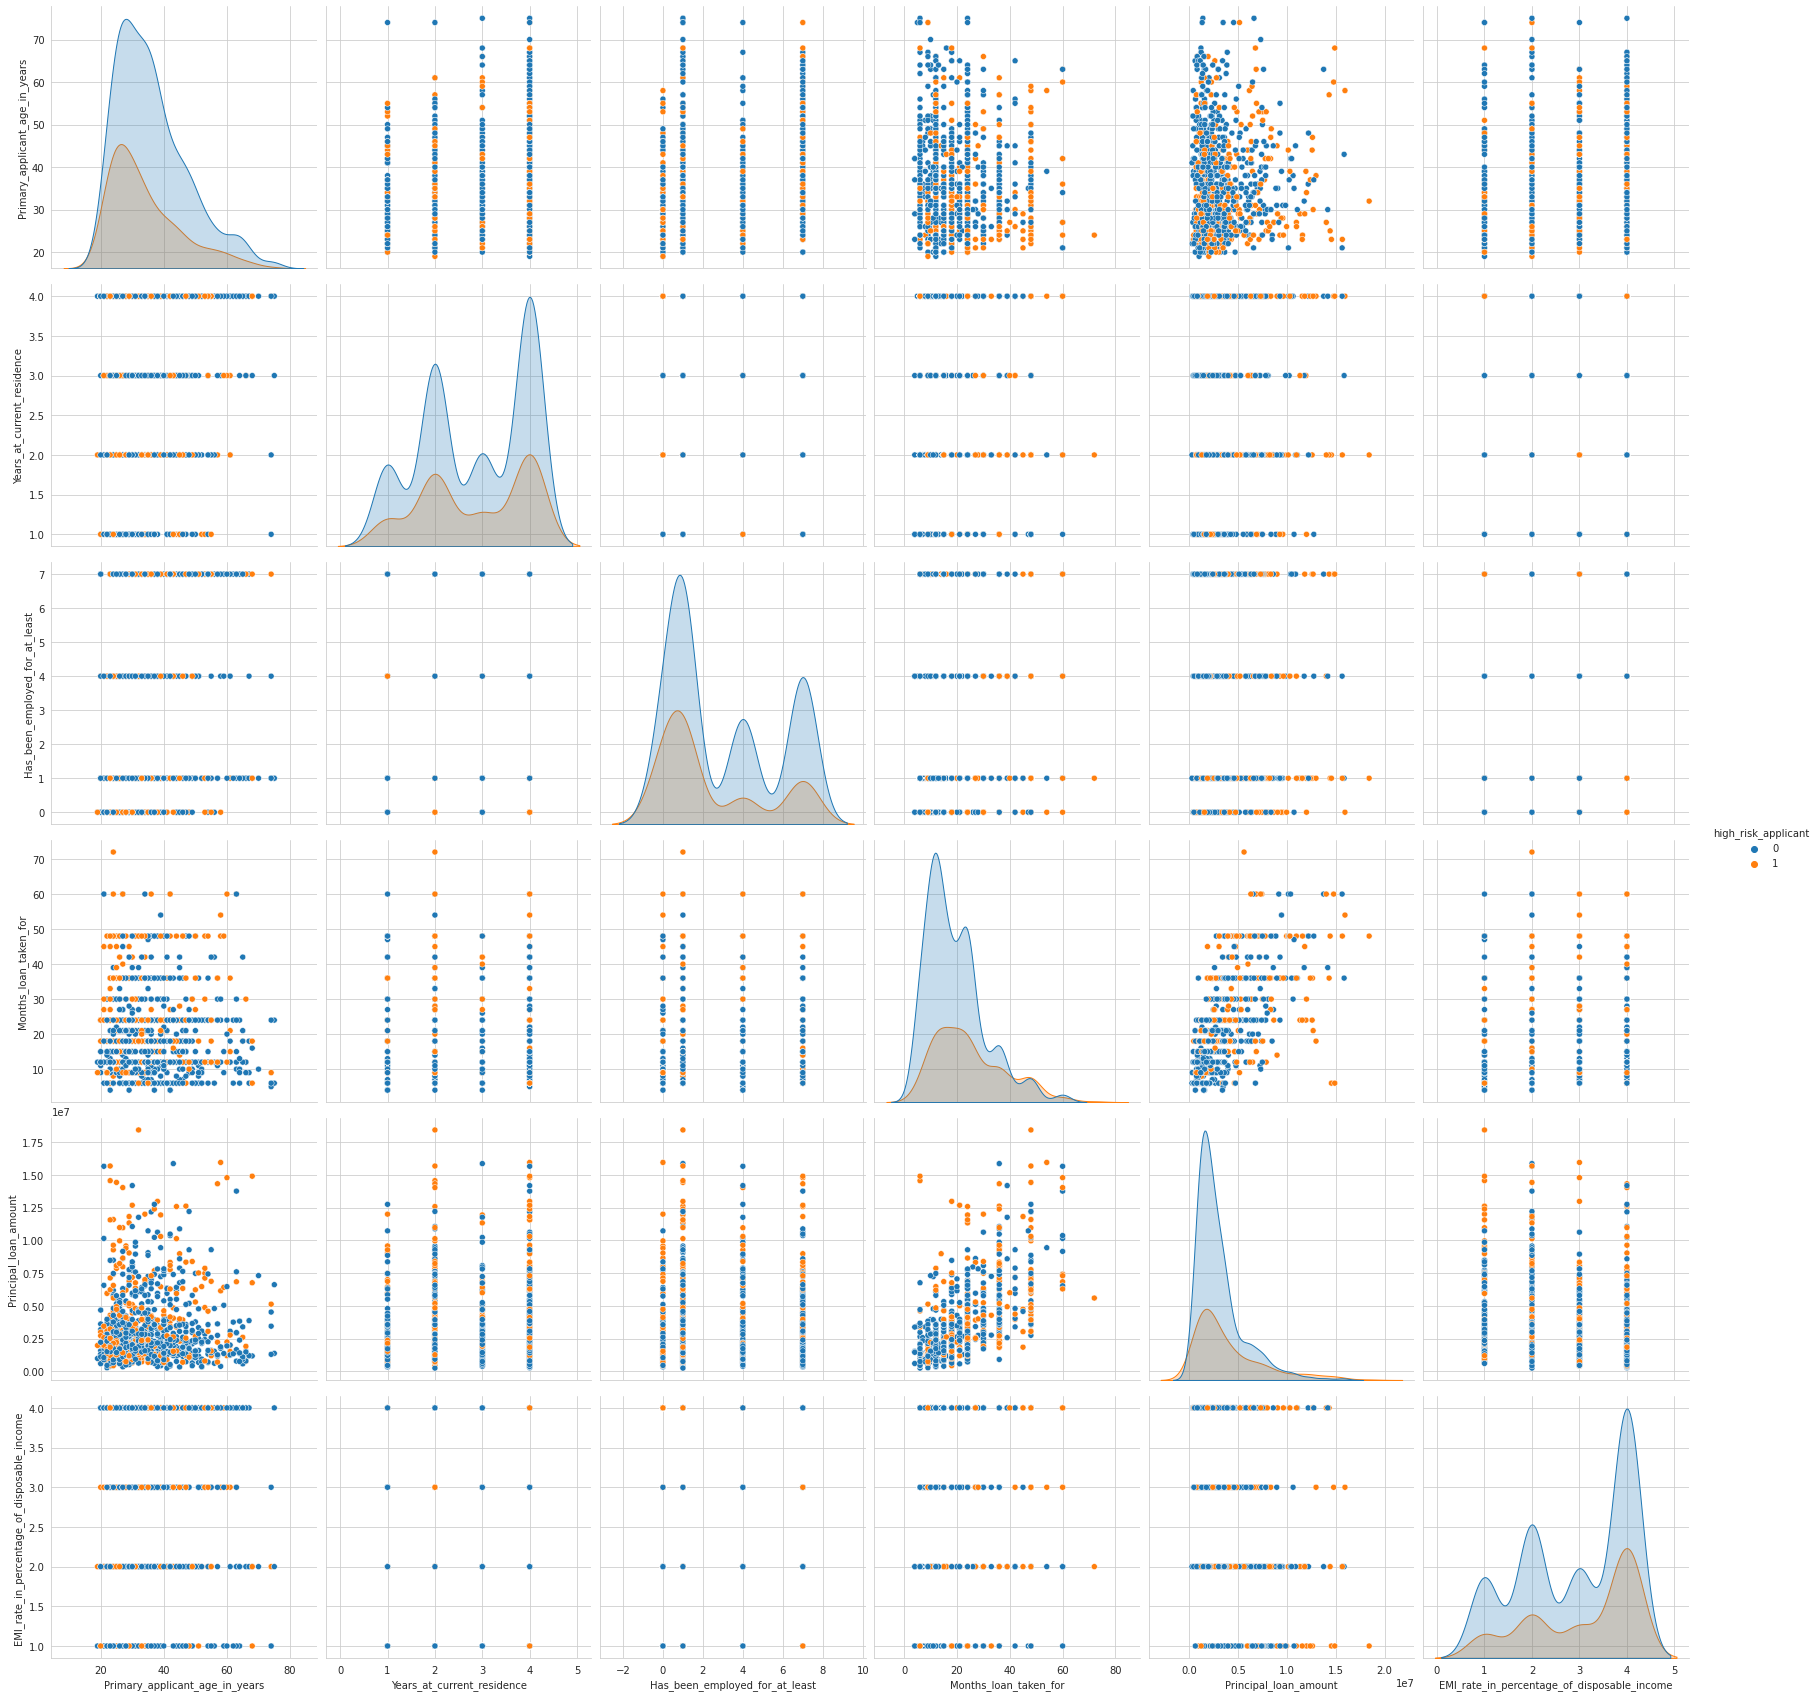

In [ ]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(numeric_loan2,hue = 'high_risk_applicant',size =4)
plt.show()

Observation:
1. It is clear from the pariplot that there isn't any significant correlation between any of the features using which we can easily derive their creditworthiness.

#Combining Observation from both numeric and categorical features

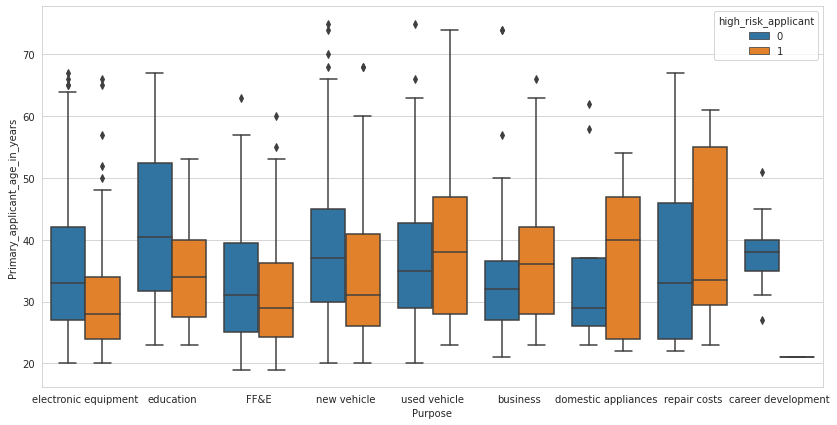

In [ ]:
fig, ax = plt.subplots(figsize=(14,7))
b1 = sns.boxplot(loan.Purpose, loan.Primary_applicant_age_in_years, hue = loan.high_risk_applicant)
plt.show()

Observations:

1. From the observation of categorical features we concluded that people taking education loans are more creditworthy. Here we can see that most of the people taking education loan between age of 28-40 can't pay back their loans on time. So from both the observations we can say that people in their late 20's and 30's who take education loan are more creditworthy.

2. Similarly People in thier late 20's and 30's who has taken loan for new_vehicle has higher creditworthiness.

2. One key observation here is that people who took carrer developement loans have the least creditworthiness.


[]

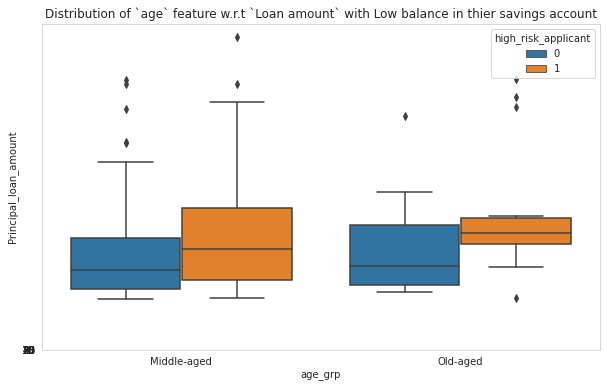

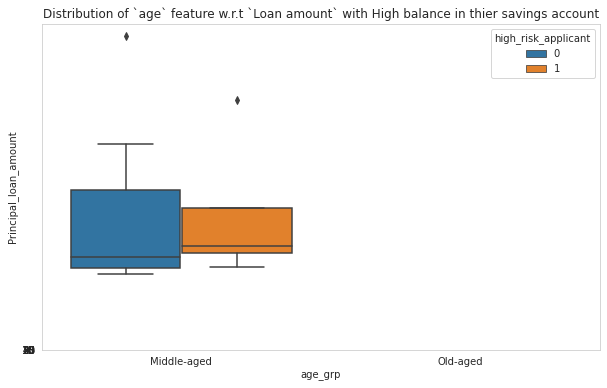

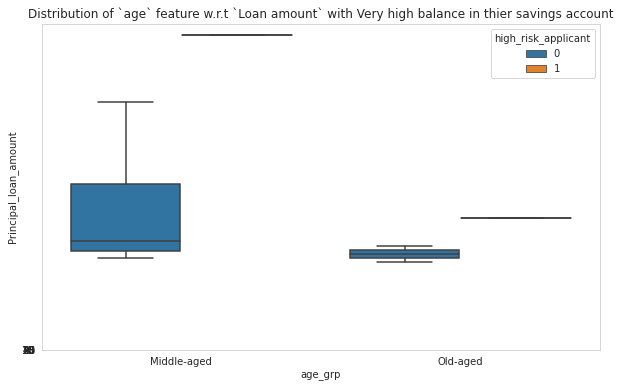

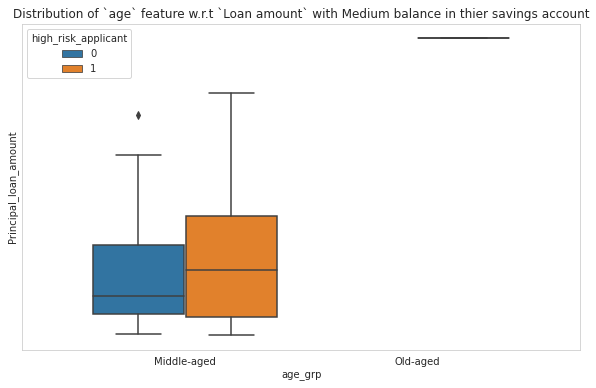

In [ ]:
for i in list(loan.Savings_account_balance.unique()):
  grp_1 = "Middle-aged"
  grp_2 = "Old-aged"
  mid_age = 52 #mean of the datapoints
  # Add new column to store age group of patients.
  numeric_loan2["age_grp"] = numeric_loan2["Primary_applicant_age_in_years"].apply(lambda age: grp_1 if age <= mid_age else grp_2)

  # DataFrame filter for patients with affected nodes.
  fltr = (numeric_loan2["Principal_loan_amount"] > 3000000) & (loan.Savings_account_balance == i)
  nodes_gtz = numeric_loan2[fltr]  # Apply filter

  # Plot box-plot
  plt.figure(figsize=(10, 6))

  sns.boxplot(x="age_grp", y="Principal_loan_amount", hue="high_risk_applicant", data=nodes_gtz, order=[grp_1, grp_2])
  plt.title(f"Distribution of `age` feature w.r.t `Loan amount` with {i} balance in thier savings account")
  plt.yticks(ticks=range(0, 55, 5))

  plt.savefig("14. Distribution of `age` feature w.r.t `Loan amount`.png")
plt.plot()

Observations:

1. Bank should give loans to old aged people who have either medium to Very High amount in their savings account.

In [178]:
numeric_loan_feature_selection=  loan[['applicant_id','Primary_applicant_age_in_years',
 'Years_at_current_residence',
 'Months_loan_taken_for',
 'Principal_loan_amount',
 'EMI_rate_in_percentage_of_disposable_income']]
numeric_loan_feature_selection.head()

,applicant_id,Primary_applicant_age_in_years,Years_at_current_residence,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income
0,1469590,67,4,6,1169000,4
1,1203873,22,2,48,5951000,2
2,1432761,49,3,12,2096000,2
3,1207582,45,4,42,7882000,2
4,1674436,53,4,24,4870000,3


In [181]:
numeric_loan_feature_selection.columns

Index(['applicant_id', 'Primary_applicant_age_in_years',
       'Years_at_current_residence', 'Months_loan_taken_for',
       'Principal_loan_amount'],
      dtype='object')

In [182]:
final_data = pd.merge(numeric_loan_feature_selection,category_loan_feature_selection, on = 'applicant_id')

In [183]:
list(final_data.columns)

['applicant_id',
 'Primary_applicant_age_in_years',
 'Years_at_current_residence',
 'Months_loan_taken_for',
 'Principal_loan_amount',
 'Marital_status',
 'Savings_account_balance',
 'Purpose',
 'Property',
 'Loan_history',
 'high_risk_applicant',
 'gen_house']

In [192]:
final_data  = final_data.reindex(columns = ['applicant_id',
 'Primary_applicant_age_in_years',
 'Years_at_current_residence',
 'Months_loan_taken_for',
 'Principal_loan_amount',
 'Marital_status',
 'Savings_account_balance',
 'Purpose',
 'Property',
 'Loan_history',
 'gen_house',
 'high_risk_applicant'])

In [194]:
final_data.head()

,applicant_id,Primary_applicant_age_in_years,Years_at_current_residence,Months_loan_taken_for,Principal_loan_amount,Marital_status,Savings_account_balance,Purpose,Property,Loan_history,gen_house,high_risk_applicant
0,1469590,67,4,6,1169000,single,Low,electronic equipment,real estate,critical/pending loans at other banks,male & own,0
1,1203873,22,2,48,5951000,divorced/separated/married,Low,electronic equipment,real estate,existing loans paid back duly till now,female & own,1
2,1432761,49,3,12,2096000,single,Low,education,real estate,critical/pending loans at other banks,male & own,0
3,1207582,45,4,42,7882000,single,Low,FF&E,building society savings agreement/life insurance,existing loans paid back duly till now,male & for free,0
4,1674436,53,4,24,4870000,single,Low,new vehicle,car or other,delay in paying off loans in the past,male & for free,1


In [195]:
final_data.to_csv('/content/drive/MyDrive/load_defaulter/data/final_loan_data.csv')

In [188]:
final_data.Loan_history.unique()

array(['critical/pending loans at other banks',
       'existing loans paid back duly till now',
       'delay in paying off loans in the past',
       'no loans taken/all loans paid back duly',
       'all loans at this bank paid back duly'], dtype=object)

data preprocessing for model training and testing

In [29]:
import pandas as pd
final_data = pd.read_csv('/content/drive/MyDrive/load_defaulter/data/final_loan_data.csv',index_col = False)

In [33]:
final_data.drop(columns = ['Unnamed: 0'],inplace = True)

In [34]:
final_data.head()

,applicant_id,Primary_applicant_age_in_years,Years_at_current_residence,Months_loan_taken_for,Principal_loan_amount,Marital_status,Savings_account_balance,Purpose,Property,Loan_history,gen_house,high_risk_applicant
0,1469590,67,4,6,1169000,single,Low,electronic equipment,real estate,critical/pending loans at other banks,male & own,0
1,1203873,22,2,48,5951000,divorced/separated/married,Low,electronic equipment,real estate,existing loans paid back duly till now,female & own,1
2,1432761,49,3,12,2096000,single,Low,education,real estate,critical/pending loans at other banks,male & own,0
3,1207582,45,4,42,7882000,single,Low,FF&E,building society savings agreement/life insurance,existing loans paid back duly till now,male & for free,0
4,1674436,53,4,24,4870000,single,Low,new vehicle,car or other,delay in paying off loans in the past,male & for free,1


In [35]:
!pip install category_encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Binary Encoding


 - Binary encoding is a combination of Hash encoding and one-hot encoding. In this encoding scheme, the categorical feature is first converted into numerical using an ordinal encoder. Then the numbers are transformed in the binary number. After that binary value is split into different columns.

 - Binary encoding works really well when there are a high number of categories. For example the cities in a country where a company supplies its products.

 - Binary encoding is a memory-efficient encoding scheme as it uses fewer features than one-hot encoding. Further, It reduces the curse of dimensionality for data with high cardinality.



In [45]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols = ['Marital_status','Savings_account_balance','Purpose','Property','Loan_history','gen_house'], return_df = True)
final_data_encoded = encoder.fit_transform(final_data.iloc[:,:-1])
final_data_encoded.head()

,applicant_id,Primary_applicant_age_in_years,Years_at_current_residence,Months_loan_taken_for,Principal_loan_amount,Marital_status_0,Marital_status_1,Marital_status_2,Savings_account_balance_0,Savings_account_balance_1,...,Purpose_2,Purpose_3,Property_0,Property_1,Loan_history_0,Loan_history_1,Loan_history_2,gen_house_0,gen_house_1,gen_house_2
0,1469590,67,4,6,1169000,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
1,1203873,22,2,48,5951000,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
2,1432761,49,3,12,2096000,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
3,1207582,45,4,42,7882000,0,0,1,0,0,...,1,1,1,0,0,1,0,0,1,1
4,1674436,53,4,24,4870000,0,0,1,0,0,...,0,0,1,1,0,1,1,0,1,1


##Data Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
import numpy as np

X = np.array(final_data_encoded.iloc[:,1:])
y = np.array(final_data.iloc[:,-1])
y = y.reshape(-1,1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[:,0:4])
X_scaled = np.concatenate((X_scaled, X[:,4:]), axis = 1)

In [47]:
print(X_scaled.shape,y.shape)

(1000, 22) (1000, 1)


In [48]:
X[:,0:4][0]

array([     67,       4,       6, 1169000])

##train test split

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size = 0.4,random_state = 20)

In [50]:

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(600, 22) (400, 22) (600, 1) (400, 1)


Model Training

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

models = [DecisionTreeClassifier(), SVC(), GradientBoostingClassifier(), RandomForestClassifier()]

for model in models:

    model.fit(X_train, y_train)
    # Make predictions on the test data
    y_pred = model.predict(X_test)

    print(model)
    print(accuracy_score(y_test,y_pred))




DecisionTreeClassifier()
0.6625
SVC()
0.665


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()
0.7025


<ipython-input-51-979ff403d026>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier()
0.6975


Here we can apply some optimization technique to improve the accuracy of each model.

In [74]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.6925


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


New Data Prediction

In [59]:
df = pd.DataFrame({
    'applicant_id':[1207582],
    'Primary_applicant_age_in_years': [40],
    'Years_at_current_residence': [5],
    'Months_loan_taken_for': [3],
    'Principal_loan_amount': [1069492],
    'Marital_status': ['single'],
    'Savings_account_balance': ['Low'],
    'Purpose': ['electronic equipment'],
    'Property': ['real estate'],
    'Loan_history': ['critical/pending loans at other banks'],
    'gen_house': ['male & own']
})
# encoder = ce.BinaryEncoder(cols = ['Marital_status','Savings_account_balance','Purpose','Property','Loan_history','gen_house'], return_df = True)
data_point_encoded = encoder.transform(df)

In [60]:
data_point_encoded

,applicant_id,Primary_applicant_age_in_years,Years_at_current_residence,Months_loan_taken_for,Principal_loan_amount,Marital_status_0,Marital_status_1,Marital_status_2,Savings_account_balance_0,Savings_account_balance_1,...,Purpose_2,Purpose_3,Property_0,Property_1,Loan_history_0,Loan_history_1,Loan_history_2,gen_house_0,gen_house_1,gen_house_2
0,1207582,40,5,3,1069492,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1


In [61]:
data_x = data_point_encoded.values[0].reshape(1,-1)
data_x_scaled = scaler.transform(data_x[:,1:5])
data_x_scaled = np.concatenate((data_x_scaled, data_x[:, 5:]), axis=1)
# data_x_scaled = np.concatenate( (data_x_scaled, data_x[:,4:]), axis = 1)

In [63]:
data_x_scaled.shape

(1, 22)

In [66]:
model.predict(data_x_scaled)[0]

0

#Pickling the model file for deployment

In [75]:
import pickle
pickle.dump(model,open('/content/drive/MyDrive/load_defaulter/classmodel.pkl','wb'))


In [76]:
pickled_model = pickle.load(open('/content/drive/MyDrive/load_defaulter/classmodel.pkl','rb'))